# College Football Analysis

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np

In [4]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

from IPython.display import Image
def draw(A):
    return Image(A.draw(format='png', prog='dot'))

In [5]:
import sys
from pathlib import Path
home = str(Path.home())

sys.path.insert(0,"%s/rankability_toolbox_dev"%home)

In [6]:
import pyrankability

In [7]:
tested_files = [
    home+'/college_football_analysis/data/Big12/2004.csv', # Example 3
    home+'/college_football_analysis/data/Big12/2005.csv', # Example 1
    home+'/college_football_analysis/data/Big12/2010.csv', # Example 2
    home+'/college_football_analysis/data/BigEast/2008.csv', # Example 4
    home+'/college_football_analysis/data/BigEast/1999.csv', # Example 5    
]

In [9]:
file = tested_files[1]
print('File selected is',file)
results = {}

File selected is /home/jupyter-pander14/college_football_analysis/data/Big12/2005.csv


In [130]:
D = pd.read_csv(file,header=None)
D

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,10,0,0,0,0,0,10,0,0,0
1,0,0,0,31,3,29,0,0,34,0,21,0
2,0,14,0,0,28,0,0,0,27,0,28,0
3,0,0,3,0,0,10,25,0,0,0,0,0
4,0,0,0,9,0,8,0,0,0,0,0,0
5,15,0,3,0,0,0,17,0,7,0,0,0
6,9,27,7,0,2,0,0,0,0,0,0,0
7,7,0,0,16,22,0,7,0,28,0,6,0
8,0,0,0,0,0,0,0,0,0,0,0,7
9,62,92,0,52,0,31,0,33,19,0,11,35


In [131]:
#D.values[np.where(D <= 3)] = 0 # Anything less than or equal to field goal is a tie 
#D

## What does it look like as a graph?

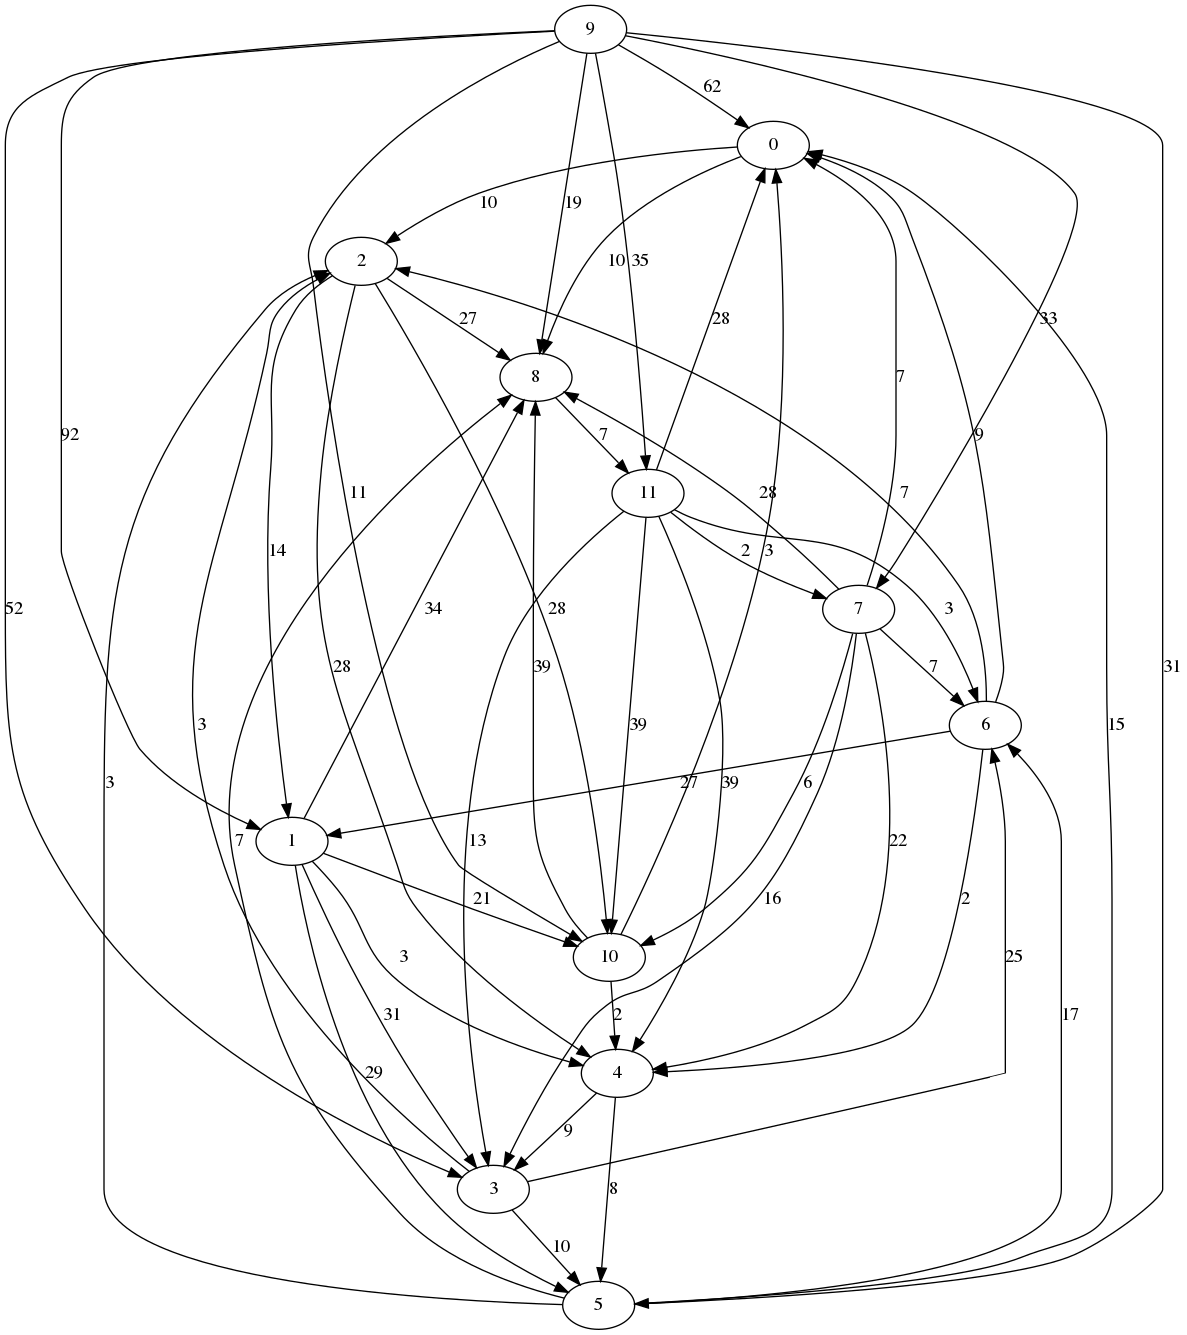

In [132]:
pyrankability.plot.D_as_graph(D)

## Choose your method

In [133]:
methods = ['hillside','lop']
method = methods[1]
results[method] = {}

##  BILP

In [134]:
k,details = pyrankability.rank.solve(D,method=method,cont=False)
k

59

### One solution

In [135]:
perm = pd.Series(details['P'][0])
perm

0      9
1     11
2      7
3      2
4      1
5     10
6      4
7      3
8      5
9      6
10     0
11     8
dtype: int64

In [136]:
results[method]['perm'] = perm

### X

In [137]:
pd.DataFrame(details['x'])

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,1,1,1,0,1,0,1,0
2,1,1,0,1,1,1,1,0,1,0,1,0
3,1,0,0,0,0,1,1,0,1,0,0,0
4,1,0,0,1,0,1,1,0,1,0,0,0
5,1,0,0,0,0,0,1,0,1,0,0,0
6,1,0,0,0,0,0,0,0,1,0,0,0
7,1,1,1,1,1,1,1,0,1,0,1,0
8,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,1,0,1,1


## X[r,r]

In [138]:
pd.DataFrame(details['x'][perm,:][:,perm])

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,1,1,1,1,1,1,1,1,1,1,1
1,0,0,1,1,1,1,1,1,1,1,1,1
2,0,0,0,1,1,1,1,1,1,1,1,1
3,0,0,0,0,1,1,1,1,1,1,1,1
4,0,0,0,0,0,1,1,1,1,1,1,1
5,0,0,0,0,0,0,1,1,1,1,1,1
6,0,0,0,0,0,0,0,1,1,1,1,1
7,0,0,0,0,0,0,0,0,1,1,1,1
8,0,0,0,0,0,0,0,0,0,1,1,1
9,0,0,0,0,0,0,0,0,0,0,1,1


## D[r,r]

In [139]:
pd.DataFrame(D.iloc[perm,:].iloc[:,perm])

,9,11,7,2,1,10,4,3,5,6,0,8
9,0,35,33,0,92,11,0,52,31,0,62,19
11,0,0,2,0,0,39,39,13,0,3,28,0
7,0,0,0,0,0,6,22,16,0,7,7,28
2,0,0,0,0,14,28,28,0,0,0,0,27
1,0,0,0,0,0,21,3,31,29,0,0,34
10,0,0,0,0,0,0,2,0,0,0,3,39
4,0,0,0,0,0,0,0,9,8,0,0,0
3,0,0,0,3,0,0,0,0,10,25,0,0
5,0,0,0,3,0,0,0,0,0,17,15,7
6,0,0,0,7,27,0,2,0,0,0,9,0


## LP

In [140]:
k,details = pyrankability.rank.solve(D,method=method,cont=True)
results[method]['lp_details'] = details
k

59

In [141]:
pd.DataFrame(pyrankability.common.threshold_x(details['x']))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,0.000000
1,1.0,0.000000,0.000000,1.0,1.0,1.0,1.0,0.545754,1.0,0.000000,1.0,0.484806
2,1.0,1.000000,0.000000,1.0,1.0,1.0,1.0,0.665287,1.0,0.398402,1.0,0.626419
3,1.0,0.000000,0.000000,0.0,0.0,1.0,1.0,0.000000,1.0,0.000000,0.0,0.000000
4,1.0,0.000000,0.000000,1.0,0.0,1.0,1.0,0.000000,1.0,0.000000,0.0,0.000000
5,1.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,1.0,0.000000,0.0,0.000000
6,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,0.000000
7,1.0,0.454246,0.334713,1.0,1.0,1.0,1.0,0.000000,1.0,0.000000,1.0,0.000000
8,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,1.0,1.000000,0.601598,1.0,1.0,1.0,1.0,1.000000,1.0,0.000000,1.0,1.000000


In [142]:
pd.DataFrame(pyrankability.common.threshold_x(details['x'])[perm,:][:,perm])

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,1.000000,1.000000,0.601598,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.000000,0.000000,1.000000,0.373581,0.515194,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.000000,0.000000,0.000000,0.334713,0.454246,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.398402,0.626419,0.665287,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.000000,0.484806,0.545754,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0


## Most distant pairs

In [143]:
k_two_distant,details_two_distant = pyrankability.search.solve_pair_max_tau(D,method=method,verbose=False)
details_two_distant['obj']

5.0

In [144]:
details_two_distant['tau']

0.8484848484848485

In [145]:
details_two_distant['perm_x']

(2, 9, 1, 11, 7, 10, 4, 3, 5, 6, 0, 8)

In [146]:
details_two_distant['perm_y']

(9, 11, 7, 2, 1, 10, 4, 3, 5, 6, 0, 8)

In [147]:
list(details_two_distant['perm_x'])

[2, 9, 1, 11, 7, 10, 4, 3, 5, 6, 0, 8]

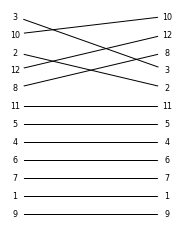

In [148]:
g = pyrankability.plot.spider(pyrankability.plot.AB_to_P2(1+np.array(details_two_distant['perm_x']),1+np.array(details_two_distant['perm_y'])),file="example_1_max_pair.png",width=3,height=4)
results[method]['two_distant_g'] = g
g

## Code below compares all of the results you've run so far

In [149]:
label = "A"
xstars = {}
indices = {}
details_cont = {}
for method in methods:
    if method not in results:
        continue
    details = results[method]['lp_details']
    xstar = pd.DataFrame(details['x'],index=D.index,columns=D.columns)
    xstars["%s. %s"%(label,method)] = xstar
    indices["%s. %s"%(label,method)] = details['indices']
    label = chr(ord(label)+1)
g,score_df,ordered_xstars = pyrankability.plot.show_score_xstar2(xstars,
                                                                 group_label="Group",width=300,height=300,
                                                                 columns=2,resolve_scale=True)
g

alt.FacetChart(...)

## Collect all the solutions

In [150]:
delta_lop_with_models,details_lop_with_models = pyrankability.rank.solve(D,method='lop',cont=False,include_model=True)
delta_hillside_with_models,details_hillside_with_models = pyrankability.rank.solve(D,method='hillside',cont=False,include_model=True)

In [165]:
perms,xs,xstar = pyrankability.search.collect(D,details_lop_with_models['model'],details_lop_with_models['obj'])

/home/jupyter-pander14/rankability_toolbox_dev/pyrankability/search.py:512: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  solutions = pd.read_csv(solution_file,sep=', ')


In [166]:
perms

[array([ 9, 11,  2,  1,  7, 10,  4,  3,  5,  6,  0,  8]),
 array([ 9, 11,  2,  7,  1, 10,  4,  3,  5,  6,  0,  8]),
 array([ 9, 11,  7,  2,  1, 10,  4,  3,  5,  6,  0,  8]),
 array([ 9,  2,  1, 11,  7, 10,  4,  3,  5,  6,  0,  8]),
 array([ 2,  9,  1, 11,  7, 10,  4,  3,  5,  6,  0,  8]),
 array([ 2,  9, 11,  1,  7, 10,  4,  3,  5,  6,  0,  8]),
 array([ 2,  9, 11,  7,  1, 10,  4,  3,  5,  6,  0,  8]),
 array([ 9,  2, 11,  7,  1, 10,  4,  3,  5,  6,  0,  8]),
 array([ 9,  2, 11,  1,  7, 10,  4,  3,  5,  6,  0,  8])]